<a href="https://colab.research.google.com/github/anudaindu/CM2604_Telco_Churn_Anuda/blob/main/AnudaTelco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!git config --global user.email "anudaindu@gmail.com"
!git config --global user.name "anudaindu"


In [3]:
!git clone https://github.com/anudaindu/Telco_Churn_Anuda.git

Cloning into 'Telco_Churn_Anuda'...
fatal: could not read Username for 'https://github.com': No such device or address


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DatasetTelco/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes               

In [14]:
df.rename(columns={
    'tenure': 'CustomerDuration',
    'SeniorCitizen': 'IsSeniorCitizen',
    'Partner': 'HasPartner',
    'Dependents': 'HasDependents',
    'PhoneService': 'HasPhoneService',
    'MultipleLines': 'HasMultipleLines',
    'OnlineSecurity': 'HasOnlineSecurity',
    'OnlineBackup': 'HasOnlineBackup',
    'DeviceProtection': 'HasDeviceProtection',
    'TechSupport': 'HasTechSupport',
    'StreamingTV': 'HasStreamingTV',
    'StreamingMovies': 'HasStreamingMovies',
    'PaperlessBilling': 'IsPaperlessBilling'
}, inplace=True)


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df.loc[df['CustomerDuration'] == 0, 'TotalCharges'] = 0


In [17]:
df['IsSeniorCitizen'] = df['IsSeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [18]:
df.info()
df.isnull().sum()
df.describe()
df.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   IsSeniorCitizen      7043 non-null   object 
 3   HasPartner           7043 non-null   object 
 4   HasDependents        7043 non-null   object 
 5   CustomerDuration     7043 non-null   int64  
 6   HasPhoneService      7043 non-null   object 
 7   HasMultipleLines     7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   HasOnlineSecurity    7043 non-null   object 
 10  HasOnlineBackup      7043 non-null   object 
 11  HasDeviceProtection  7043 non-null   object 
 12  HasTechSupport       7043 non-null   object 
 13  HasStreamingTV       7043 non-null   object 
 14  HasStreamingMovies   7043 non-null   object 
 15  Contract             7043 non-null   o

np.int64(0)

Task 1  EDA



In [19]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerDuration,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [20]:
df.describe(include="object")

,customerID,gender,IsSeniorCitizen,HasPartner,HasDependents,HasPhoneService,HasMultipleLines,InternetService,HasOnlineSecurity,HasOnlineBackup,HasDeviceProtection,HasTechSupport,HasStreamingTV,HasStreamingMovies,Contract,IsPaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [21]:
#Target variabe analysis
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [22]:
(df['Churn'].value_counts(normalize=True) * 100)


,proportion
Churn,
No,73.463013
Yes,26.536987


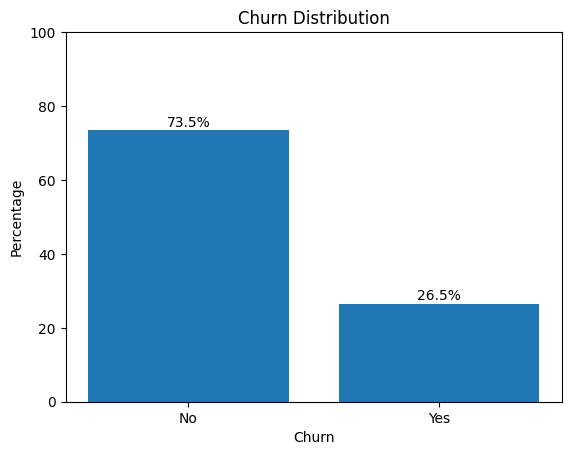

In [23]:
counts = df['Churn'].value_counts()
percentages = counts / len(df) * 100

bars = plt.bar(counts.index, percentages)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 1, f'{y:.1f}%',
             ha='center')

plt.ylim(0,100)
plt.show()


Dataset is inbalanced
26% churn, 74% non churn

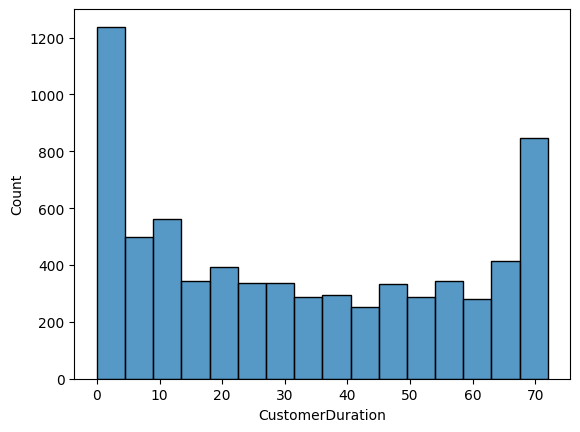

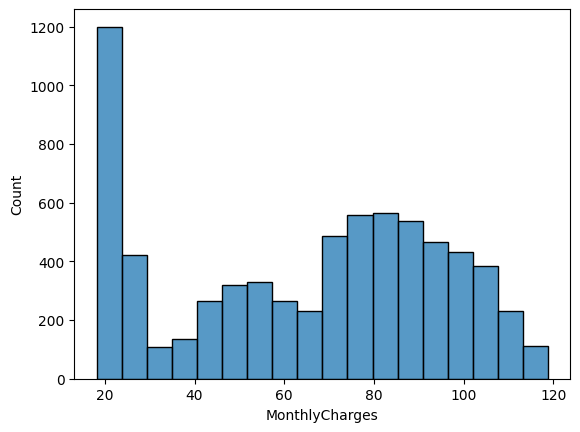

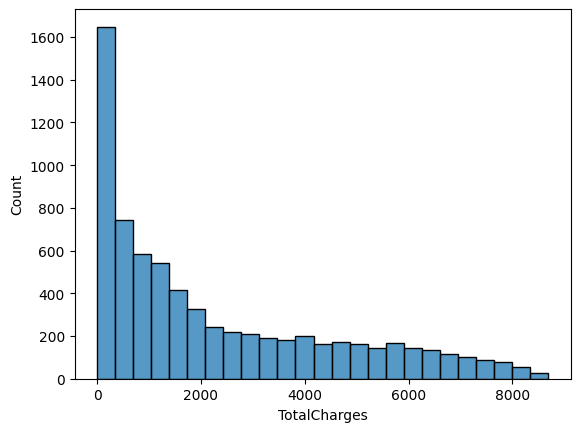

In [24]:
#histogram to understand the distribution
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()


# New Section

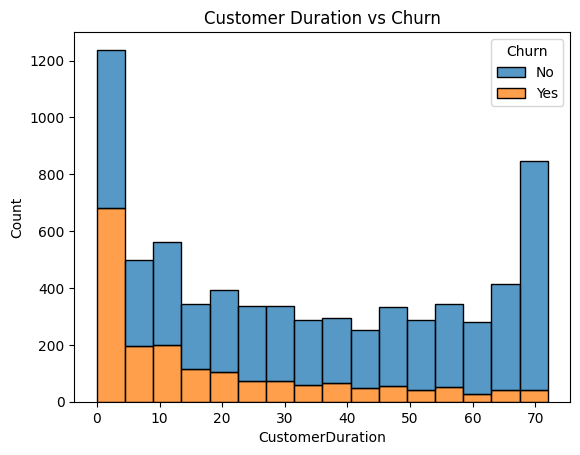

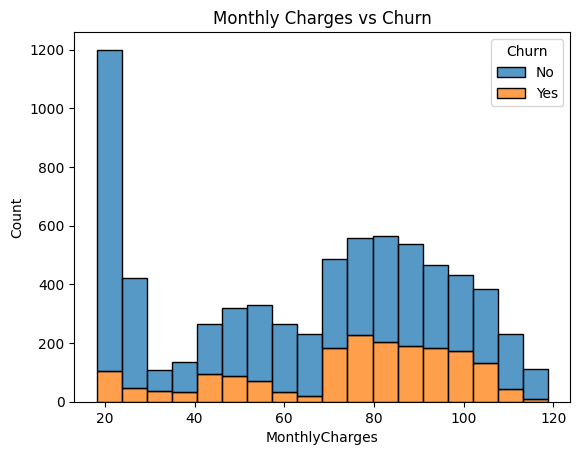

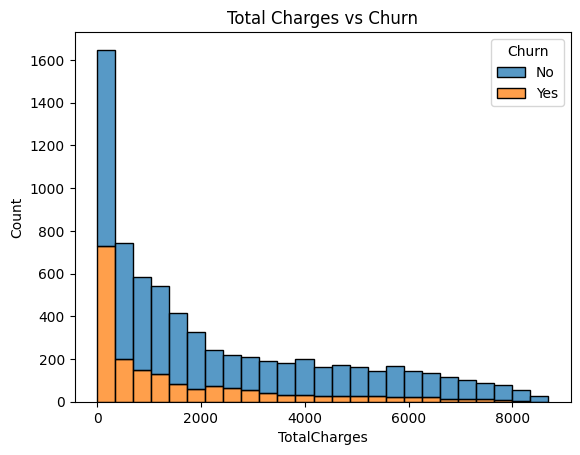

In [25]:
# Customer Duration vs Churn
sns.histplot(data=df, x='CustomerDuration', hue='Churn', multiple='stack')
plt.title('Customer Duration vs Churn')
plt.show()

# Monthly Charges vs Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.title('Monthly Charges vs Churn')
plt.show()

#Total Charge vs Churn
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack')
plt.title('Total Charges vs Churn')
plt.show()

short tenure goes to hugher churn, higher monthly charges goes to higher churn

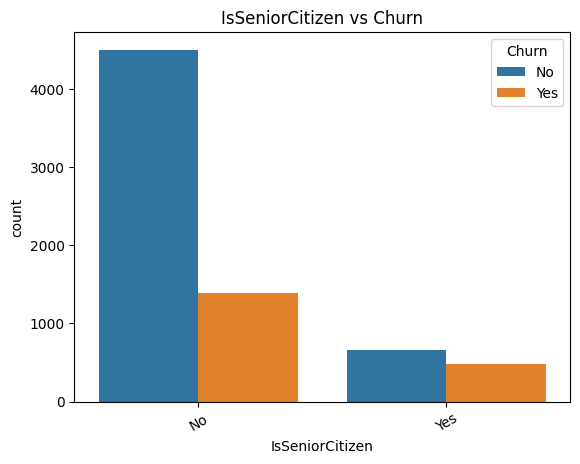

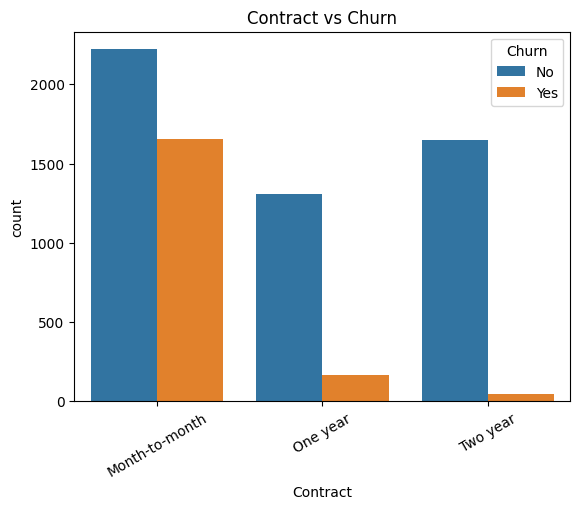

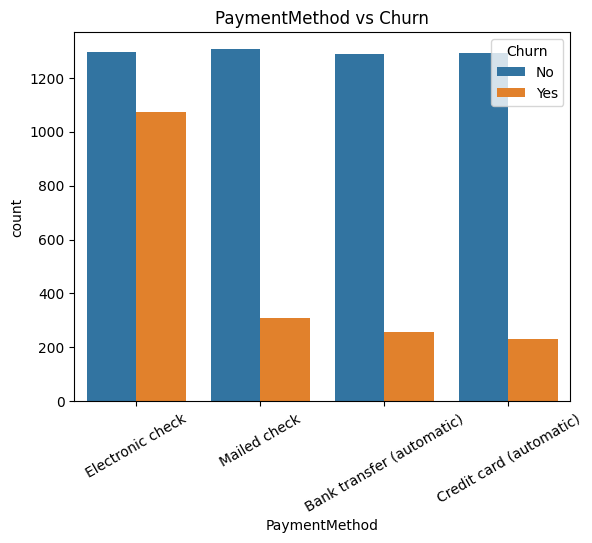

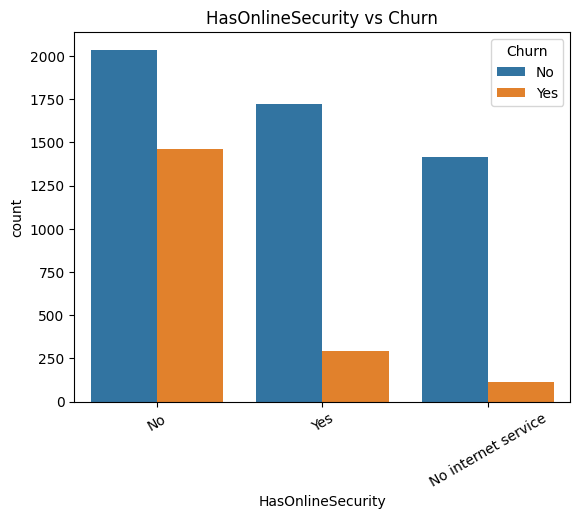

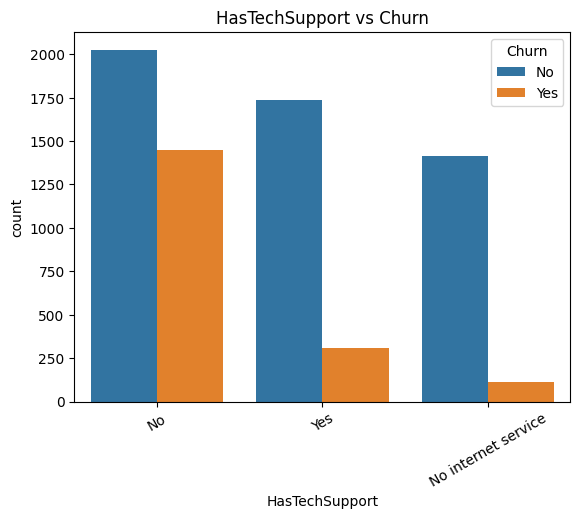

In [26]:
#Categorical vs Churn
cat_cols = [
    'IsSeniorCitizen','Contract','PaymentMethod',
    'HasOnlineSecurity','HasTechSupport'
]

for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=30)
    plt.title(f'{col} vs Churn')
    plt.show()



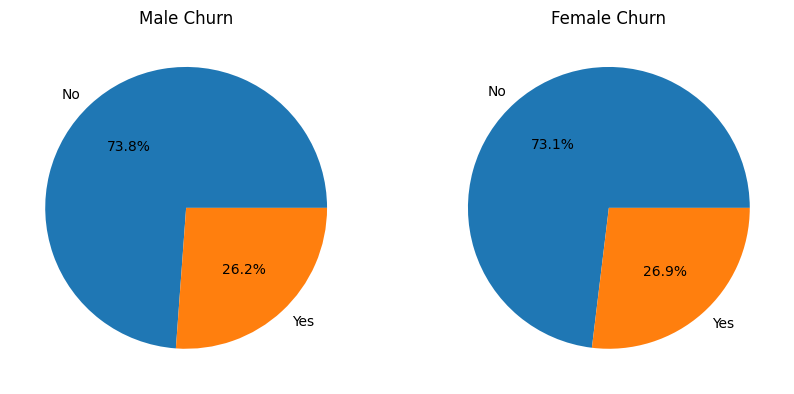

In [27]:
male = df[df['gender'] == 'Male']['Churn'].value_counts()
female = df[df['gender'] == 'Female']['Churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].pie(male, labels=male.index, autopct='%1.1f%%')
axes[0].set_title('Male Churn')

axes[1].pie(female, labels=female.index, autopct='%1.1f%%')
axes[1].set_title('Female Churn')
plt.show()

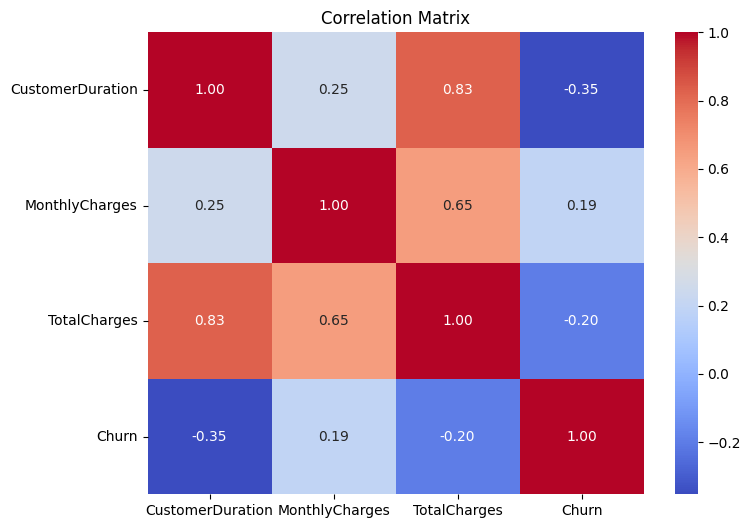

In [28]:
#corelation Alaysis
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes':1, 'No':0})

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.select_dtypes(include='number').corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


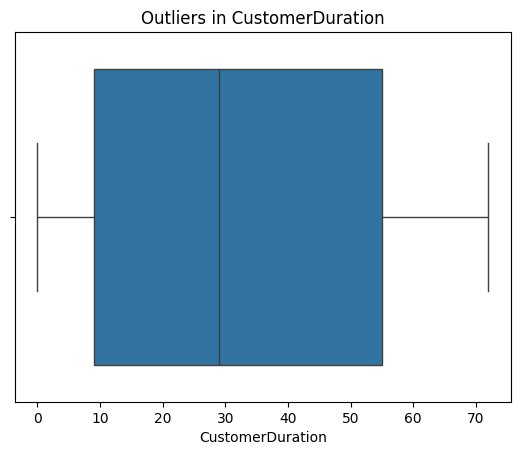

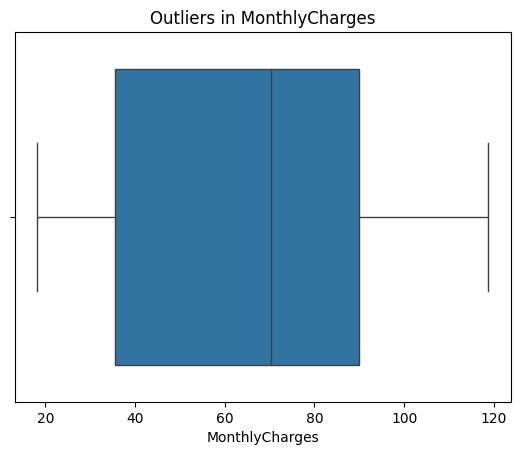

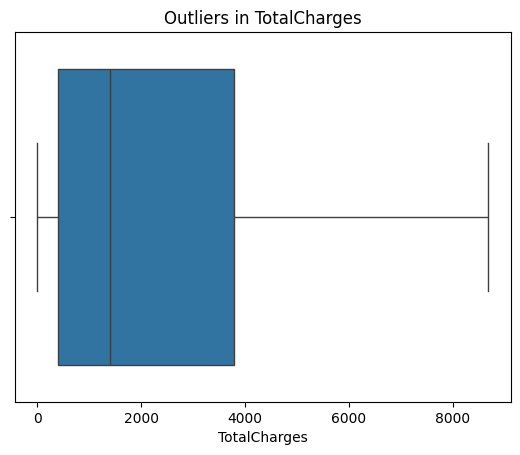

In [29]:
#Outlier ditection
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


TASK 2

Data Preprocessing

In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder


Drop non predictive Coloumns

In [31]:
df_model = df.copy()

# customerID has no predictive value
df_model.drop(columns=['customerID'], errors='ignore', inplace=True)


Encode Target Variable

In [32]:
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})


One-Hot Encode Categorical Features

In [33]:
df_model = pd.get_dummies(df_model, drop_first=True)


Feature Scaling (Important for Neural Network)

In [34]:
scaler = MinMaxScaler()
df_model[['CustomerDuration', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_model[['CustomerDuration', 'MonthlyCharges', 'TotalCharges']]
)


Train–Test Split (Stratified)

In [35]:
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Handle Class Imbalance – SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

print("Before SMOTE:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:\n", y_train.value_counts())


Before SMOTE:
 Churn
0    4139
1    1495
Name: count, dtype: int64

After SMOTE:
 Churn
0    4139
1    4139
Name: count, dtype: int64


Model 1 – Decision Tree Classifier

Hyperparameter Tuning (GridSearch)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_grid = GridSearchCV(
    dt,
    dt_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
print("Best DT Parameters:", dt_grid.best_params_)


Best DT Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [39]:
final_dt = DecisionTreeClassifier(
    **dt_grid.best_params_,
    random_state=42,
    class_weight='balanced'
)

final_dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=20, random_state=42)

Evaluate Decision Tree

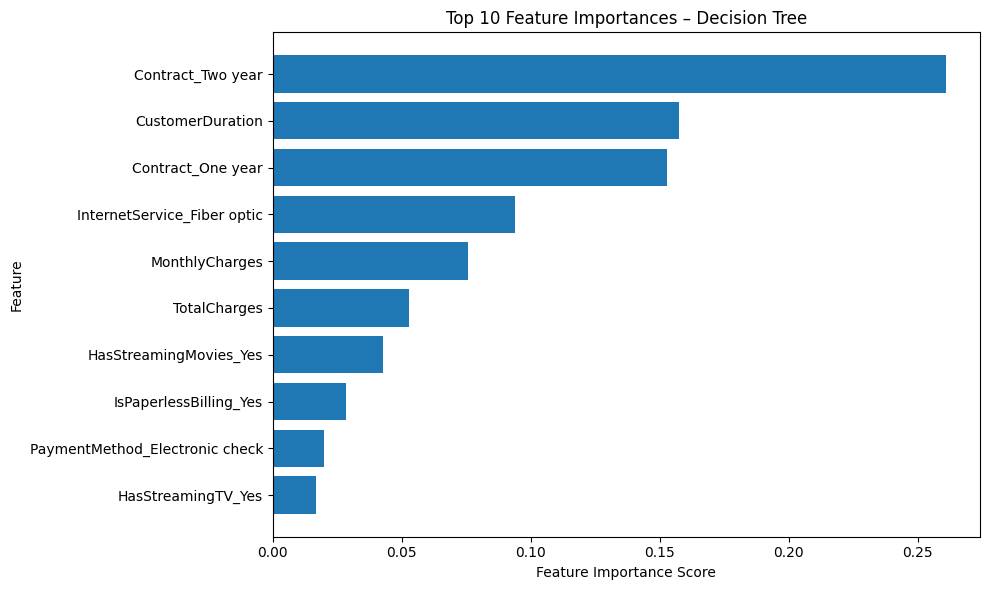

In [40]:
# Get feature importances from trained Decision Tree
importances = best_dt.feature_importances_

# Get feature names (after encoding)
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance (descending)
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Select top 10 features for clarity
top_features = feature_importance_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances – Decision Tree')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()

# Save figure
plt.savefig('dt_feature_importance.png', dpi=300)
plt.show()

Confusion Matrix

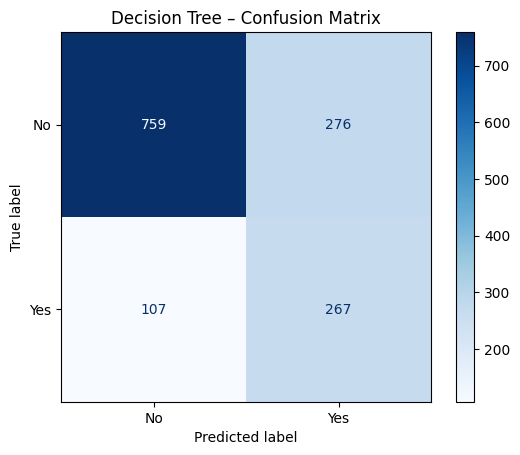

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_preds = final_dt.predict(X_test)

cm = confusion_matrix(y_test, dt_preds)
disp = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Decision Tree – Confusion Matrix")
plt.show()


Classification Report

In [42]:
dt_pred = best_dt.predict(X_test)
dt_prob = best_dt.predict_proba(X_test)[:, 1]

print("Decision Tree Classification Report\n")
print(classification_report(y_test, dt_pred))

dt_f1 = f1_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_prob)

print("DT F1 Score:", dt_f1)
print("DT ROC-AUC:", dt_auc)


Decision Tree Classification Report

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1035
           1       0.49      0.71      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409

DT F1 Score: 0.5823336968375137
DT ROC-AUC: 0.7769459298871064


ROC curve

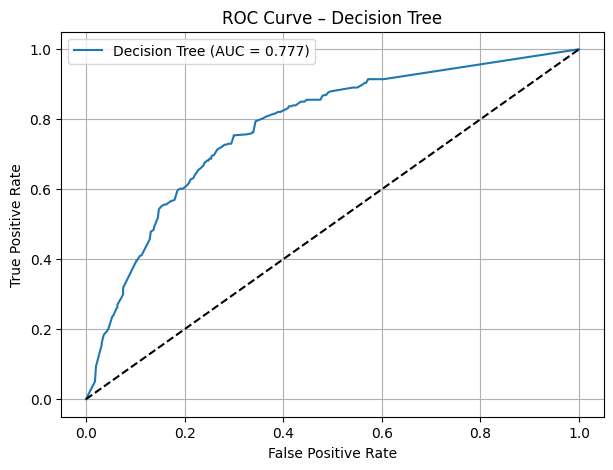

In [43]:
from sklearn.metrics import roc_curve, auc

dt_probs = final_dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, dt_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.grid()
plt.show()


Training and Test Peformance

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score

train_auc = roc_auc_score(y_train, final_dt.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, dt_probs)

print(f"Training ROC-AUC: {train_auc:.4f}")
print(f"Test ROC-AUC: {test_auc:.4f}")


Training ROC-AUC: 0.9193
Test ROC-AUC: 0.7769


Neural Network (ANN model)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,
    roc_curve, auc,
    roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score
)

import matplotlib.pyplot as plt


In [46]:
#Build ANN model

In [47]:
ann = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')   # Binary classification
])
ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

ann.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Train ANN model

In [48]:
history = ann.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)


Epoch 1/50
259/259 - 2s - 8ms/step - accuracy: 0.7214 - loss: 0.5551 - val_accuracy: 0.7204 - val_loss: 0.5259
Epoch 2/50
259/259 - 1s - 2ms/step - accuracy: 0.7643 - loss: 0.4988 - val_accuracy: 0.7367 - val_loss: 0.4921
Epoch 3/50
259/259 - 1s - 2ms/step - accuracy: 0.7698 - loss: 0.4860 - val_accuracy: 0.7402 - val_loss: 0.4886
Epoch 4/50
259/259 - 1s - 2ms/step - accuracy: 0.7710 - loss: 0.4798 - val_accuracy: 0.7395 - val_loss: 0.4881
Epoch 5/50
259/259 - 1s - 2ms/step - accuracy: 0.7780 - loss: 0.4707 - val_accuracy: 0.7331 - val_loss: 0.5189
Epoch 6/50
259/259 - 1s - 2ms/step - accuracy: 0.7791 - loss: 0.4682 - val_accuracy: 0.7317 - val_loss: 0.5176
Epoch 7/50
259/259 - 1s - 2ms/step - accuracy: 0.7809 - loss: 0.4616 - val_accuracy: 0.7466 - val_loss: 0.4835
Epoch 8/50
259/259 - 1s - 3ms/step - accuracy: 0.7833 - loss: 0.4587 - val_accuracy: 0.7495 - val_loss: 0.4864
Epoch 9/50
259/259 - 1s - 5ms/step - accuracy: 0.7857 - loss: 0.4552 - val_accuracy: 0.7346 - val_loss: 0.5080
E

ANN Lost Curve

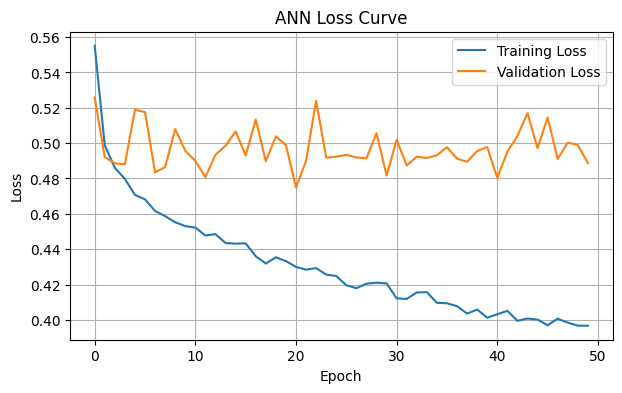

In [49]:
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


ANN Training metrics

In [50]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("FINAL ANN TRAINING METRICS")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


FINAL ANN TRAINING METRICS
Final Training Loss: 0.3967
Final Validation Loss: 0.4887
Final Training Accuracy: 0.8213
Final Validation Accuracy: 0.7722


ANN Confusion metrix

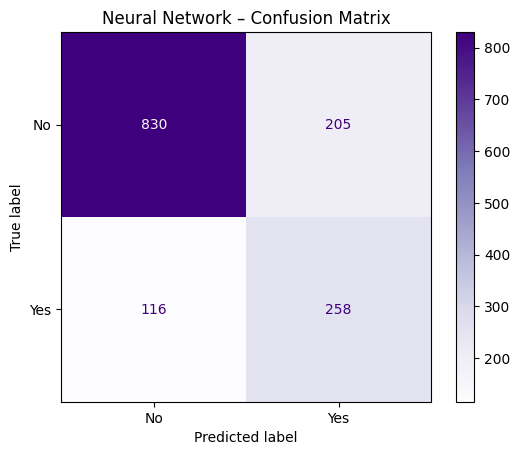

In [51]:
ann_test_probs = ann.predict(X_test, verbose=0).ravel()
ann_test_preds = (ann_test_probs >= 0.5).astype(int)

cm_ann = confusion_matrix(y_test, ann_test_preds)
disp = ConfusionMatrixDisplay(cm_ann, display_labels=["No", "Yes"])
disp.plot(cmap='Purples')
plt.title("Neural Network – Confusion Matrix")
plt.show()


ANN ROC Curve

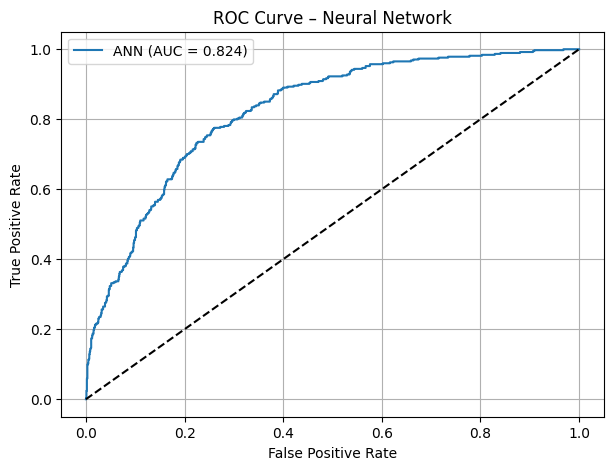

In [52]:
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_test_probs)
auc_ann = auc(fpr_ann, tpr_ann)

plt.figure(figsize=(7,5))
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {auc_ann:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Neural Network")
plt.legend()
plt.grid()
plt.show()


ANN Evaluation

In [53]:
# ---- TRAIN ----
ann_train_probs = ann.predict(X_train, verbose=0).ravel()
ann_train_preds = (ann_train_probs >= 0.5).astype(int)

train_auc_ann = roc_auc_score(y_train, ann_train_probs)
train_acc_ann = accuracy_score(y_train, ann_train_preds)

# ---- TEST ----
test_auc_ann = roc_auc_score(y_test, ann_test_probs)
test_acc_ann = accuracy_score(y_test, ann_test_preds)

print("ANN PERFORMANCE (TRAIN vs TEST)")
print(f"Training ROC-AUC: {train_auc_ann:.4f}")
print(f"Test ROC-AUC: {test_auc_ann:.4f}")

print(f"Training Accuracy: {train_acc_ann:.4f}")
print(f"Training Accuracy %: {train_acc_ann*100:.2f}%")

print(f"Test Accuracy: {test_acc_ann:.4f}")
print(f"Test Accuracy %: {test_acc_ann*100:.2f}%")


ANN PERFORMANCE (TRAIN vs TEST)
Training ROC-AUC: 0.9191
Test ROC-AUC: 0.8244
Training Accuracy: 0.8349
Training Accuracy %: 83.49%
Test Accuracy: 0.7722
Test Accuracy %: 77.22%


ANN Classification Report

In [54]:
print("ANN CLASSIFICATION REPORT (TEST SET)")
print(classification_report(y_test, ann_test_preds))


ANN CLASSIFICATION REPORT (TEST SET)
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.69      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



Combined ROC Curve DT vs ANN

In [55]:
# Recompute Decision Tree ROC values (safe fix)

dt_test_preds = final_dt.predict(X_test)
dt_test_probs = final_dt.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_test_probs)
auc_dt = auc(fpr_dt, tpr_dt)


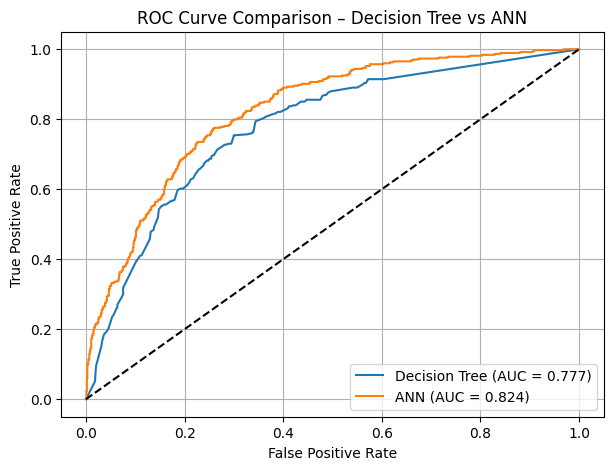

In [56]:
plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_ann, tpr_ann, label=f"ANN (AUC = {auc_ann:.3f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Decision Tree vs ANN")
plt.legend()
plt.grid()
plt.show()


Model Comparison Table

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

comparison = {
    "Model": ["Decision Tree", "Neural Network"],

    "Accuracy": [
        accuracy_score(y_test, dt_test_preds),
        accuracy_score(y_test, ann_test_preds)
    ],

    "Precision (Churn=1)": [
        precision_score(y_test, dt_test_preds),
        precision_score(y_test, ann_test_preds)
    ],

    "Recall (Churn=1)": [
        recall_score(y_test, dt_test_preds),
        recall_score(y_test, ann_test_preds)
    ],

    "F1 Score (Churn=1)": [
        f1_score(y_test, dt_test_preds),
        f1_score(y_test, ann_test_preds)
    ],

    "ROC-AUC": [
        auc_dt,
        auc_ann
    ]
}

results_df = pd.DataFrame(comparison)
results_df


,Model,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 Score (Churn=1),ROC-AUC
0,Decision Tree,0.728176,0.491713,0.713904,0.582334,0.776946
1,Neural Network,0.772179,0.557235,0.689840,0.616487,0.824395


Bar Chart Comparison

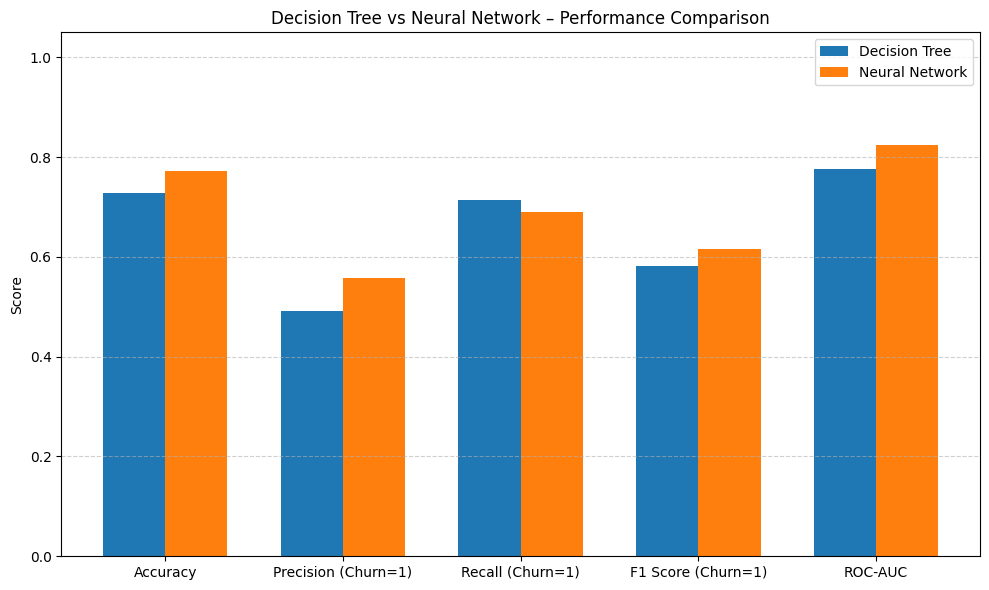

In [58]:
metrics = ["Accuracy", "Precision (Churn=1)", "Recall (Churn=1)", "F1 Score (Churn=1)", "ROC-AUC"]

dt_vals = results_df.iloc[0, 1:].values
ann_vals = results_df.iloc[1, 1:].values

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, dt_vals, width, label="Decision Tree")
plt.bar(x + width/2, ann_vals, width, label="Neural Network")

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Decision Tree vs Neural Network – Performance Comparison")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


Task 3: AI Ethics and Post-Deployment Strategy
3.1 Ethical Considerations
Bias Mitigation and Fairness
In the beginning EDA exploratory data analysis is shows a significant class inbalance in the data set, approximately 73% customers classified as non churn and 26% classified as churn, So tariining a model with this inbalanced distribution with result in biased prediction that favor the majority class,leading the poor identification of customers at risk of churn
To adjust this issue the SMOTE (Synthetic Minority Over sampling Technique was used to
 trainingdataset to balance class representation. In addition class weighting was incoparated.while the mode training to minimize the misclassification of minority class, so these strategies are helped to ensure the model learns equally from both churned and non chrued customer groups.
________________________________________
Data Privacy and Regulatory Compliance (GDPR)
Sensitive customer identifiers are excluded from tis modeling process to protect the individual privacy and reduce the data misuse , In a real-world deployment scenario, strict data privacy measures must be enforced to comply with General Data Protection Regulation (GDPR) requirements. All Personally Identifiable Information (PII), such as customer identifiers, must be removed or irreversibly anonymized through hashing before data is processed by the model.
Furthermore, access to the data and model predictions should be restricted to authorized personnel only, and data retention policies should be defined to ensure that customer information is not stored longer than necessary.
________________________________________
3.2 Post-Deployment Strategy
Model Monitoring and Data Drift Detection
Customer behavior and service usage patterns evolve over time, which can lead to data drift and a gradual degradation of model performance. To address this, a continuous monitoring system should be implemented to track the statistical distribution of key input features such as MonthlyCharges and CustomerDuration.
If significant deviations between live production data and the original training data are detected, automated alerts will trigger a model evaluation and retraining pipeline. This ensures that the predictive system remains accurate, reliable, and aligned with current customer behavior.
Deployment as continuous monitoring in model performance is very important to make sure the sustain accuracy and reliability. The Key performance metrics is must tracked continuously to identify the potential degradation.
In the future customer behavior, market conditions and service offerings might lead to data drift, so to address this the mechanism should be detect significant deviation between incoming data and original data, so when such drifts are identified the model should undergo systematic evaluation and retraining.

________________________________________
Human-in-the-Loop Decision Making
To prevent inappropriate automated actions, a human-in-the-loop approach is incorporated into the deployment strategy. Predictions that fall within an uncertainty range specifically churn probabilities between 40% and 60%,are not acted upon automatically.
Instead, these cases are escalated to trained customer support agents for manual review. This approach reduces the risk of incorrectly targeting satisfied customers with unnecessary retention offers and ensures that final decisions incorporate human judgment alongside algorithmic recommendations.
